# Fake News Detection

1. A

2. B

3. C

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import re
import string
from sklearn.metrics import accuracy_score, confusion_matrix

### Load the data

In [21]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

## Fake News Database
### First view of the data

In [22]:
df_fake.head()

,title,text,subject,date
0,Federal Judge Rules That Trump DID Incite Vio...,Hearing about violence at Trump s rallies was ...,News,"April 2, 2017"
1,BUSTED! NANCY PELOSI Claims No Meeting With Ru...,Pelosi claims to have not had a meeting with ...,Government News,"Mar 3, 2017"
2,TWO NEW JERSEY MOMS Attacked By Community For ...,Two New Jersey mothers appeared on the Tucker ...,politics,"Mar 30, 2017"
3,What Keeps the F-35 Alive,"Posted on October 31, 2016 by DavidSwanson \nI...",NaN,NaN
4,‘BRIEFCASES FULL OF MONEY’…Uranium One Underco...,"As reported earlier today, Reuters has named t...",politics,"Nov 17, 2017"


### Number of rows and columns

In [23]:
df_fake.shape

(29809, 4)

### Columns and Types

In [24]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29809 entries, 0 to 29808
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    29809 non-null  object
 1   text     29809 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 931.7+ KB


## True News Database
### First view of the data

In [25]:
df_true.head()

,title,text,subject,date
0,Saudi has completed main wave of arrests in an...,WASHINGTON (Reuters) - Saudi Arabia has comple...,worldnews,"December 5, 2017"
1,Top Senate Democrat says Trump offered help fo...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 7, 2017"
2,"Hillary isn't winning over many pundits, even ...",Hillary Clinton is clobbering Bernie Sanders—a...,NaN,NaN
3,First Turkish military convoy enters Syria's I...,BEIRUT (Reuters) - A first convoy of the milit...,worldnews,"October 12, 2017"
4,U.S. embassy in Egypt bans personnel from visi...,CAIRO (Reuters) - Personnel assigned to the U....,politicsNews,"June 6, 2017"


### Number of rows and columns

In [26]:
df_true.shape

(27759, 4)

### Columns and Types

In [27]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27759 entries, 0 to 27758
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    27759 non-null  object
 1   text     27759 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 867.6+ KB


## Adding a new column: giving a class to 'Fake News' and 'True News'

In [28]:
df_fake["class"] = 0
df_true["class"] = 1

In [29]:
df_true.head()

,title,text,subject,date,class
0,Saudi has completed main wave of arrests in an...,WASHINGTON (Reuters) - Saudi Arabia has comple...,worldnews,"December 5, 2017",1
1,Top Senate Democrat says Trump offered help fo...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 7, 2017",1
2,"Hillary isn't winning over many pundits, even ...",Hillary Clinton is clobbering Bernie Sanders—a...,NaN,NaN,1
3,First Turkish military convoy enters Syria's I...,BEIRUT (Reuters) - A first convoy of the milit...,worldnews,"October 12, 2017",1
4,U.S. embassy in Egypt bans personnel from visi...,CAIRO (Reuters) - Personnel assigned to the U....,politicsNews,"June 6, 2017",1


In [30]:
df_fake.head()

,title,text,subject,date,class
0,Federal Judge Rules That Trump DID Incite Vio...,Hearing about violence at Trump s rallies was ...,News,"April 2, 2017",0
1,BUSTED! NANCY PELOSI Claims No Meeting With Ru...,Pelosi claims to have not had a meeting with ...,Government News,"Mar 3, 2017",0
2,TWO NEW JERSEY MOMS Attacked By Community For ...,Two New Jersey mothers appeared on the Tucker ...,politics,"Mar 30, 2017",0
3,What Keeps the F-35 Alive,"Posted on October 31, 2016 by DavidSwanson \nI...",NaN,NaN,0
4,‘BRIEFCASES FULL OF MONEY’…Uranium One Underco...,"As reported earlier today, Reuters has named t...",politics,"Nov 17, 2017",0


## Merge the 'Fake News' and 'True News' Database

In [31]:
df_marge = pd.concat([df_fake, df_true], axis=0)
df_marge.head()

,title,text,subject,date,class
0,Federal Judge Rules That Trump DID Incite Vio...,Hearing about violence at Trump s rallies was ...,News,"April 2, 2017",0
1,BUSTED! NANCY PELOSI Claims No Meeting With Ru...,Pelosi claims to have not had a meeting with ...,Government News,"Mar 3, 2017",0
2,TWO NEW JERSEY MOMS Attacked By Community For ...,Two New Jersey mothers appeared on the Tucker ...,politics,"Mar 30, 2017",0
3,What Keeps the F-35 Alive,"Posted on October 31, 2016 by DavidSwanson \nI...",NaN,NaN,0
4,‘BRIEFCASES FULL OF MONEY’…Uranium One Underco...,"As reported earlier today, Reuters has named t...",politics,"Nov 17, 2017",0


### Since we don't need the columns 'title', 'subject', and 'date', we dropped it


In [32]:
df = df_marge.drop(['title', 'subject', 'date'], axis=1)
df.head()

,text,class
0,Hearing about violence at Trump s rallies was ...,0
1,Pelosi claims to have not had a meeting with ...,0
2,Two New Jersey mothers appeared on the Tucker ...,0
3,"Posted on October 31, 2016 by DavidSwanson \nI...",0
4,"As reported earlier today, Reuters has named t...",0


### The next fuction clean the text from extra space, special caracters, URL, and lowercase


In [33]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

### In order to clean our Database text, we apply the previous fuction to our column 'text'


In [34]:
df["text"] = df["text"].apply(wordopt)
df.head()

,text,class
0,hearing about violence at trump s rallies was ...,0
1,pelosi claims to have not had a meeting with ...,0
2,two new jersey mothers appeared on the tucker ...,0
3,posted on october by davidswanson imagine ...,0
4,as reported earlier today reuters has named t...,0


### Shuffling

In [35]:
df = df.sample(frac = 1)

### Reset Index: 0, 1, 2...

In [36]:
df.reset_index(inplace = True)

### Deleting Index colum

In [37]:
df.drop(["index"], axis = 1, inplace = True)
df.head()

,text,class
0,shawn helton century wire the gunman named in...,0
1,on friday speaker john boehner announced that...,1
2,saturday november pundits are surprised pac...,0
3,well they say all good things must come to an...,0
4,it s no secret that trump s drain the swamp ...,0


In [38]:
df.shape

(57568, 2)

## Defining the variables for the model

In [39]:
x = df["text"]
y = df["class"]

## Split the data

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

## Text to Vectors

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Confusion Matrix

In [44]:
from sklearn.metrics import plot_confusion_matrix

In [45]:
def conf_mat_acc(model):
    disp = plot_confusion_matrix(model, xv_test, y_test, cmap=plt.cm.Blues, values_format='d')
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('accuracy: ', np.round(accuracy, 2))
    plt.show()

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

### Training Logistic regretion model

In [47]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [48]:
pred_LR = LR.predict(xv_test)
print(pred_LR)

[1 0 0 ... 0 0 0]


In [49]:
LR.score(xv_test, y_test)

0.9590064269584854

In [50]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5943
           1       0.96      0.95      0.96      5571

    accuracy                           0.96     11514
   macro avg       0.96      0.96      0.96     11514
weighted avg       0.96      0.96      0.96     11514



accuracy:  0.96


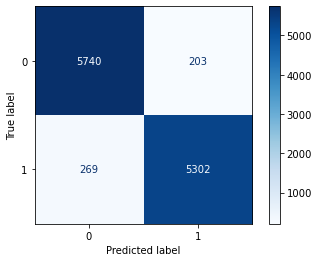

In [51]:
conf_mat_acc(LR)

The Accuracy is as follow (17508+15865)/(17508+15865+152+148)=0.99

17508: in the database the value was 0 but the prediction was 0, so it is correct!

15865: in the database the value was 1 but the prediction was 1, so it is correct! 

152: in the database the value was 0 but the prediction was 1, so it is incorrect

148: in the database the value was 1 but the prediction was 0, so it is incorrect

*The best model would be 0 in the errors (152 & 148) and whole the values in the diagonal*

## Decision Tree Classification

In [52]:
from sklearn.tree import DecisionTreeClassifier

### Training the Decision Tree

In [376]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [377]:
pred_dt = DT.predict(xv_test)

In [378]:
DT.score(xv_test, y_test)

0.9537044265750644

In [379]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6678
           1       0.95      0.95      0.95      6131

    accuracy                           0.95     12809
   macro avg       0.95      0.95      0.95     12809
weighted avg       0.95      0.95      0.95     12809



accuracy:  0.95


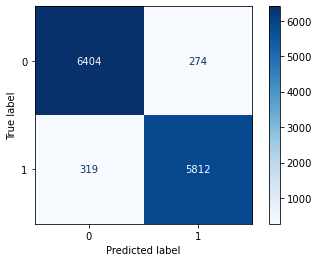

In [380]:
conf_mat_acc(DT)

## Gradient Boosting Classifier

In [381]:
from sklearn.ensemble import GradientBoostingClassifier

In [382]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [383]:
pred_gbc = GBC.predict(xv_test)

In [384]:
GBC.score(xv_test, y_test)

0.9659614333671637

In [385]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6678
           1       0.99      0.94      0.96      6131

    accuracy                           0.97     12809
   macro avg       0.97      0.97      0.97     12809
weighted avg       0.97      0.97      0.97     12809



accuracy:  0.97


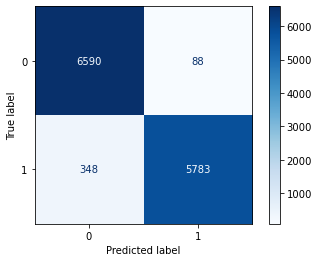

In [386]:
conf_mat_acc(GBC)

## Random Forest Classifier

In [387]:
from sklearn.ensemble import RandomForestClassifier

In [388]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [389]:
RFC.score(xv_test, y_test)

0.9582324927785151

In [390]:
pred_RFC = RFC.predict(xv_test)

In [391]:
score = accuracy_score(y_test, pred_RFC)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 95.82%


In [392]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      6678
           1       0.97      0.94      0.96      6131

    accuracy                           0.96     12809
   macro avg       0.96      0.96      0.96     12809
weighted avg       0.96      0.96      0.96     12809



accuracy:  0.96


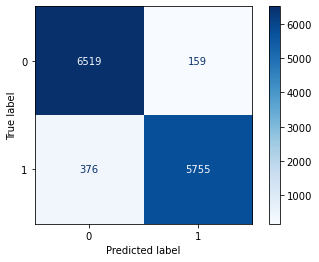

In [393]:
conf_mat_acc(RFC)

## Passive Aggressive Classifier

In [394]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [395]:
PAC=PassiveAggressiveClassifier(max_iter=50)
PAC.fit(xv_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [396]:
pred_PAC=PAC.predict(xv_test)
score = accuracy_score(y_test, pred_PAC)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 97.49%


In [397]:
PAC.score(xv_test, y_test)

0.974861425560153

accuracy:  0.97


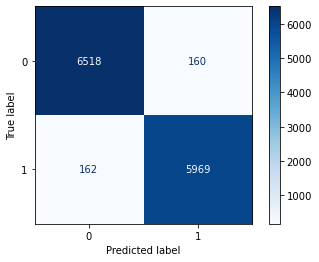

In [398]:
conf_mat_acc(PAC)

# Final Test

In [53]:
news = pd.read_csv('News.csv')
news.head()

,title,text,class,subject,date
0,Iceland's leftist opposition fails to form gov...,REYKJAVIK (Reuters) - Talks on forming a gover...,1,worldnews,"November 6, 2017"
1,"U.S. to stand with Puerto Rico until ""job is d...",WASHINGTON (Reuters) - White House chief of st...,1,politicsNews,"October 12, 2017"
2,Trump considering Rep. Hensarling for Treasury...,WASHINGTON (Reuters) - Aides to President-elec...,1,politicsNews,"November 10, 2016"
3,Pope Francis plane shifts course to avoid Hurr...,ROME (Reuters) - Pope Francis flew out of Ital...,1,worldnews,"September 6, 2017"
4,Wasserman Schultz wins Florida Democratic nod ...,WASHINGTON (Reuters) - U.S. Representative Deb...,1,politicsNews,"August 31, 2016"


In [54]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    100 non-null    object
 1   text     100 non-null    object
 2   class    100 non-null    int64 
 3   subject  90 non-null     object
 4   date     90 non-null     object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [56]:
news['class'].unique()

array([1, 0])

In [58]:
news["text"] = news["text"].apply(wordopt) 
final_x_test = news["text"]
final_xv_test = vectorization.transform(final_x_test)

In [60]:
final_y_test = news['class']

## Logistic Regression TEST

In [61]:
LR.score(final_xv_test, final_y_test)

0.98

## Decision Tree TEST

In [407]:
DT.score(final_xv_test, final_y_test)

0.9367008681925809

## Gradient Boosting Classifier TEST

In [408]:
GBC.score(final_xv_test, final_y_test)

0.77663772691397

## Random Forest Classifier

In [409]:
RFC.score(final_xv_test, final_y_test)

0.9321231254932912